In [1]:
from sp00kyvectors.core import Vector
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df = Vector.load_folder('/Users/lila/data_viz/data')

📥 Reading & aligning:   0%|          | 0/3040 [00:00<?, ?it/s]/Users/lila/sp00kyEnv/lib/python3.12/site-packages/sp00kyvectors/core.py:375: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(fp, index_col=False)                                        # no inferred index
/Users/lila/sp00kyEnv/lib/python3.12/site-packages/sp00kyvectors/core.py:375: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(fp, index_col=False)                                        # no inferred index
/Users/lila/sp00kyEnv/lib/python3.12/site-packages/sp00kyvectors/core.py:375: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(fp, index_col=False)                                        # no inferred index
/Users/lila/sp00kyEnv/lib/python3.12/s

In [3]:
df.head()

,Accel_X,Accel_Y,Accel_Z,BME680_Temp,Color_B,Color_C,Color_G,Color_R,GPS_Latitude,GPS_Longitude,...,Gyro_Y,Gyro_Z,Humidity,Mag_X,Mag_Y,Mag_Z,Pressure,Proximity,Temp_LSM9DS1,Timestamp
0,8.751150,4.183850,0.053839,19.308711,0.0,0.0,0.0,0.0,NaN,NaN,...,-0.008858,0.013286,53.611331,0.38738,-0.22946,-0.67970,1010.510860,0.0,16.5,2025-05-10T01:35:13
1,8.755338,4.200002,-0.001795,19.316328,0.0,0.0,0.0,0.0,NaN,NaN,...,-0.013592,0.016493,53.528989,0.38374,-0.22386,-0.68040,1010.516422,0.0,17.5,2025-05-10T01:35:16
2,8.772686,4.177868,0.026321,19.362031,0.0,0.0,0.0,0.0,NaN,NaN,...,-0.013592,0.018784,53.477198,0.38094,-0.23282,-0.65870,1010.523319,0.0,17.5,2025-05-10T01:35:17
3,8.749954,4.219743,0.034696,19.410664,0.0,0.0,0.0,0.0,NaN,NaN,...,-0.009927,0.016952,53.374561,0.37450,-0.23730,-0.67354,1010.535061,0.0,17.5,2025-05-10T01:35:18
4,8.763115,4.179065,0.009571,19.400703,0.0,0.0,0.0,0.0,NaN,NaN,...,-0.011148,0.017104,53.098152,0.38374,-0.23142,-0.68908,1010.534443,0.0,17.5,2025-05-10T01:35:24


In [4]:
df['BME680_Temp']

0        19.308711
1        19.316328
2        19.362031
3        19.410664
4        19.400703
           ...    
66435    25.506172
66436    25.518672
66437    25.529219
66438    25.539180
66439    25.547773
Name: BME680_Temp, Length: 66440, dtype: float64

In [5]:
pressure = Vector(
    data_points=df.loc[df['Pressure'] > 200, 'Pressure'])
gas = Vector(
    data_points=df.loc[df['Gas'] > 500, 'Gas']
)

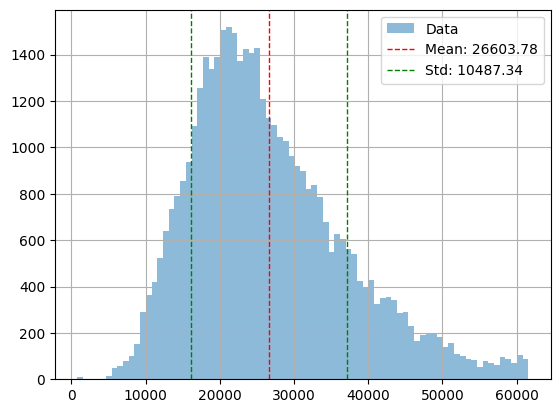

In [6]:
# just plot
gas.drop_na()
gas.drop_outliers()
gas.plot_basic_stats()

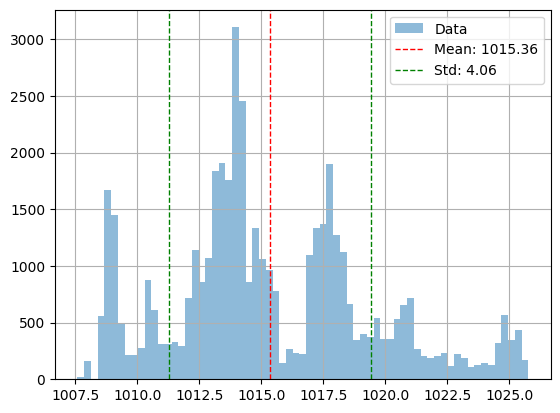

In [7]:
pressure.drop_na()
pressure.drop_outliers()
pressure.plot_basic_stats()


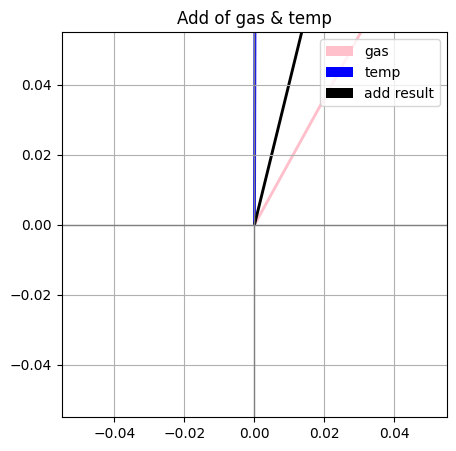

In [8]:
gas = Vector(data_points=df['Gas'], label='gas')
temp= Vector(data_points=df['Temp_LSM9DS1'], label='temp')
pressure = Vector(data_points=df['Pressure'], label='pressure')
Vector.plot_vector_op(gas, temp)

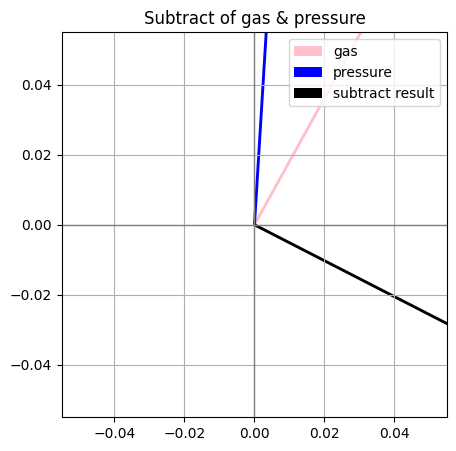

In [9]:
Vector.plot_vector_op(gas, pressure, op='subtract')

In [10]:
inter, outter, j = Vector.set_operations(gas, pressure)
print(j)

1.886721255801668e-05
